In [1]:
# Ch03. Detecting features in Images - 1
# Implementing Convolutional Neural Networks

In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import time
import os

In [3]:
from tensorflow.python.client import device_lib

# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

print(device_lib.list_local_devices())
print("====")
print(tf.test.is_gpu_available())
print("====")
print(tf.config.list_physical_devices('GPU'))

# tf.debugging.set_log_device_placement(True)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11600786724183944969
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2253809255
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3661118154899973577
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
xla_global_id: 416903419
]
====
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
====
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [4]:
data = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = data.load_data()

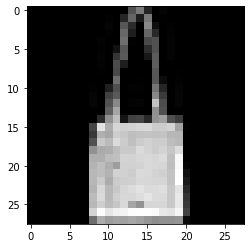

In [5]:
# plot sample images
implot = plt.imshow(training_images[200], cmap='gray')

In [6]:
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu',input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [21]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [22]:
start_time = time.time()
with tf.device('/GPU:0'):
    model.fit(training_images,training_labels,epochs=20)
print("%s seconds in CPU" %(time.time()-start_time))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4335 - accuracy: 0.8434

In [23]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5200 - accuracy: 0.9086

[0.5199709534645081, 0.9085999727249146]

In [24]:
classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

[3.9479759e-23 4.7063196e-19 1.1544166e-18 1.1135262e-24 3.2297356e-17
 1.3580760e-14 3.9996428e-20 2.6243150e-17 2.1222088e-21 1.0000000e+00]
9


In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              